### Background : 
Major proportion of retail bank profit comes from interest in the form of home loans. These loans are borrowed by regular income/high earning customers. Banks are most fearful of defaulters, as bad loans (NPA) usually eat up a major chunk of their profits and it is highly vulnerable to defaulted loans. Therefore, it is important for banks to be judicious while approving the loans for the customer. The approval process for the loans is multifaceted. It tries to check the creditworthiness of the applicant on the basis of manual study of various aspects of the applicant. This whole process is not only effort intensive but also prone to wrong judgement/approval owing to human error and biases. There have been attempts by many banks to automate this process by using heuristics. But with the advent of a lot of data and machine learning, the focus has shifted to building machines that can learn this approval process and make it free of biases as well as more efficient. At the same time, one important thing to keep in mind is to make sure when the machine learns, they have not learned the biases that previously came because of the human approval process.
A bank's consumer credit department aims to simplify the decision-making process for home equity lines of credit to be accepted. To do this they will adopt the Equal Credit Opportunity Act's guidelines to establish an empirically derived and statistically sound model for credit scoring. The model will be based on data obtained via the existing loan underwriting process from recent applicants who have been given credit. The model will be built from predictive modeling techniques, but the model created must be interpretable enough to provide a justification for any adverse behavior (rejections).


### Objective : 

* Build a classification model to predict clients who are likely to default on their loan and give recommendations to the bank on what are important features to consider while approving the loan.



### Dataset :
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent ). 12 input variables were registered for each applicant.


* BAD: 1 = Client defaulted on loan, 0 = loan repaid

* LOAN: Amount of loan approved.

* MORTDUE: Amount due on the existing mortgage.

* VALUE: Current value of the property. 

* REASON: Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* JOB: The type of job that loan applicant has such as manager, self, etc.

* YOJ: Years at present job.

* DEROG: Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* DELINQ: Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* CLAGE: Age of the oldest credit line in months. 

* NINQ: Number of recent credit inquiries. 

* CLNO: Number of existing credit lines.

* DEBTINC: Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.



### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import missingno as msno # for detecting missing values
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [2]:
path = 'D:/MIT capstone/classification/'
hm=pd.read_csv(path+"hmeq.csv")


In [3]:
# copying data to another varaible to avoid any changes to original data
data=hm.copy()

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### Understand the shape of the dataset.

In [6]:
data.shape

(5960, 13)

* The dataset has 5960 rows and 13 columns of data

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Observations -**
* There are missing values in the dataset.


In [8]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [9]:
df_missing= missing_values_table(data)
df_missing

Your selected dataframe has 13 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
DEBTINC,1267,21.3
DEROG,708,11.9
DELINQ,580,9.7
MORTDUE,518,8.7
YOJ,515,8.6
NINQ,510,8.6
CLAGE,308,5.2
JOB,279,4.7
REASON,252,4.2
CLNO,222,3.7


<AxesSubplot:>

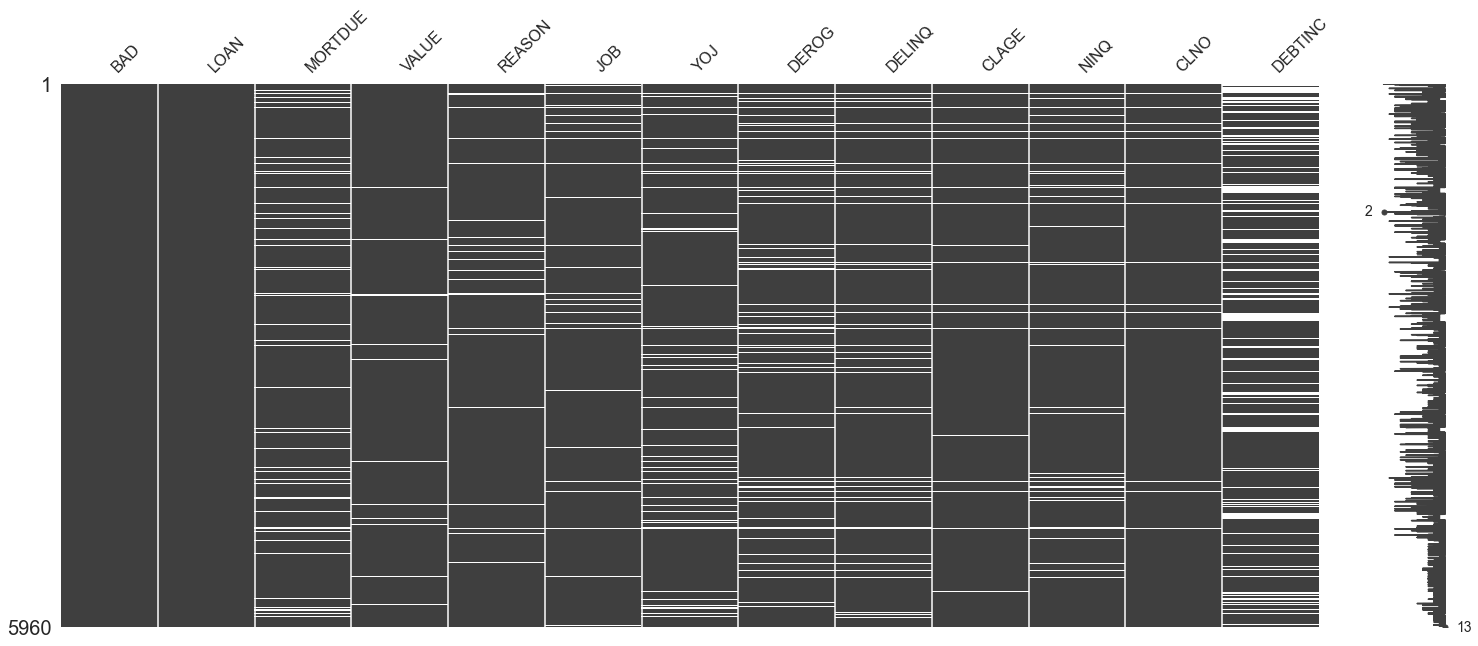

In [10]:
msno.matrix(data)

**Observations**
- There are 11 columns which has missing values
- DEBTINC variable has 21% values missing in it which is highest compared to all other 11 variables
- Dependent has no missing values

The plot appears blank(white) wherever there are missing values. For instance, in Embarked column there are only two instances of missing data, hence the two white lines.

The sparkline on the right gives an idea of the general shape of the completeness of the data and points out the row with the minimum nullities and the total number of columns in a given dataset, at the bottom.

<AxesSubplot:>

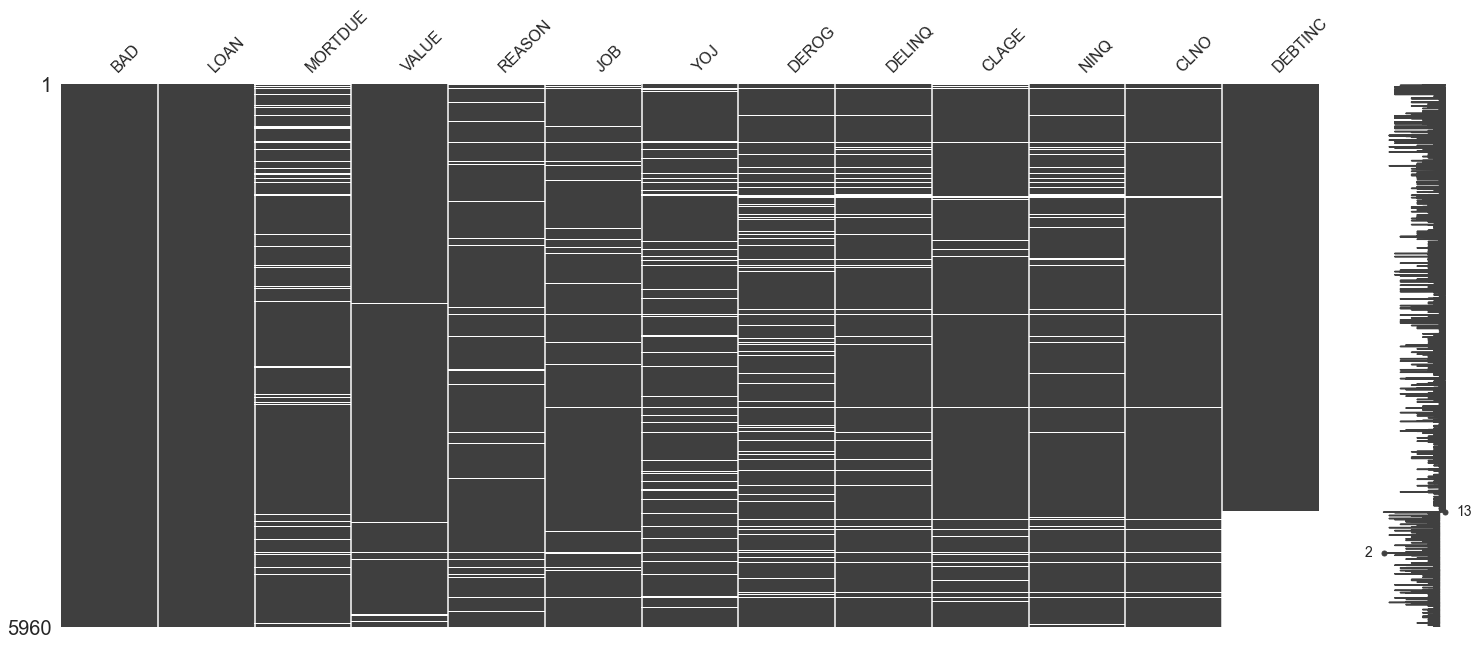

In [11]:
# Is there pattern in missing values 
#sorted by DEBTINC

sortedd = data.sort_values('DEBTINC')
msno.matrix(sortedd)

**observation**
- Most of the missing values in DEBTINC is found for higher valuer of DEBTINC
- This indicates that there is pattern in missing values of DEBTINC which might be useful in predicting the dependent variables

* We can convert the object type columns to categories.

`converting "objects" to "category" reduces the data space required to store the dataframe`

### Fixing the data types

In [12]:
cols = data.select_dtypes(['object']).columns.tolist()
cols.append('BAD')

In [13]:
for i in cols:
    data[i] = data[i].astype('category')

**observation**
- Most of the missing values in DEBTINC is found for higher valuer of DEBTINC
- This indicates that there is pattern in missing values of DEBTINC which might be useful in predicting the dependent variables

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


we can see that the memory usage has decreased from 605.4 KB KB to 524.4 KB, this technique is generally useful for bigger datasets.

### Summary of the dataset.

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


**Observations**
 - Loan Amount has mean of 18607 and standard deviation of 11207. 
 - Mortdue (amount due on existing mortgage) has mean of 73760 and standard deviation of 44457.6
 - VALUE ( current value of property) has significant difference in mean and median indicating that its distribution will be skewed.
 - all other variable has somewhat similar mean and median

In [16]:
data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Observations**
 - Mode of BAD loan is 0 
 - Mode of REASON is DebtCon (debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)
 - Mode of JOB is other.

**Let's look at the unique values of all the categories**

In [17]:
cols_cat= data.select_dtypes(['category'])
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in BAD are :
0    4771
1    1189
Name: BAD, dtype: int64
**************************************************
Unique values in REASON are :
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
**************************************************
Unique values in JOB are :
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64
**************************************************


### EDA

### Univariate analysis

In [18]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on LOAN

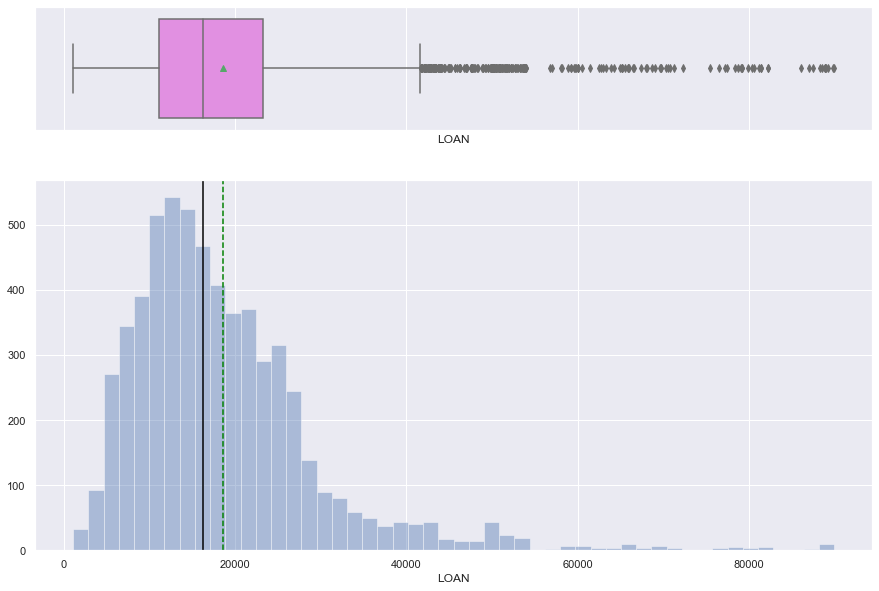

In [19]:
histogram_boxplot(data['LOAN'])

**Observations**
 - Distribution of LOAN amount looks quite normal but due upper outliers its distribution is slightly right skewed.

### Observations on MORTDUE

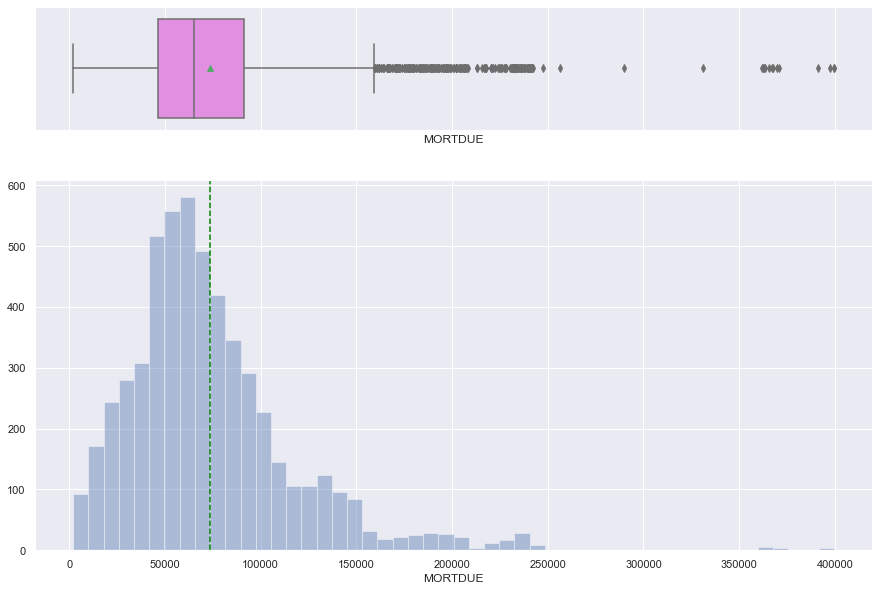

In [20]:
histogram_boxplot(data['MORTDUE'])

**Observations**
 - Mortdue has upper outliers due which its distribution is slightly right skewed.

### Observations on VALUE

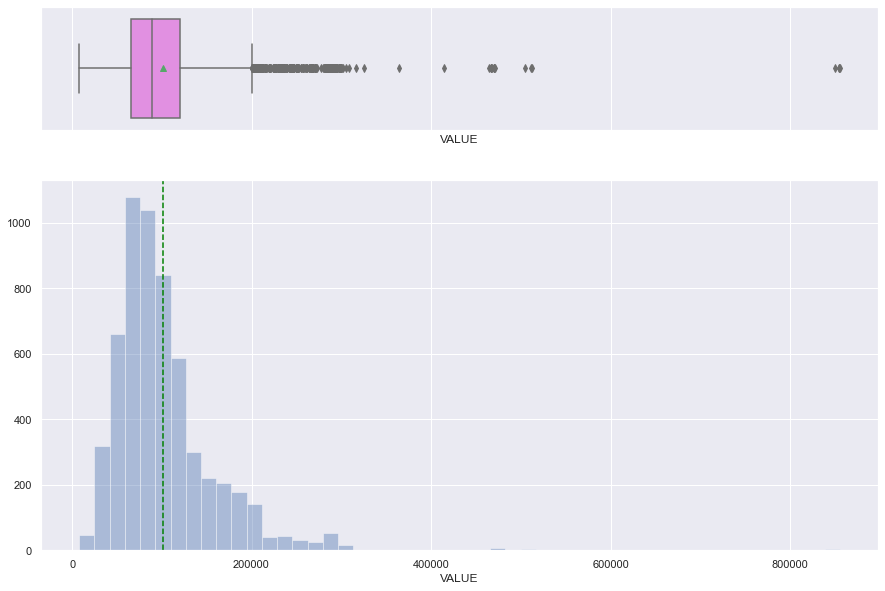

In [21]:
histogram_boxplot(data['VALUE'])

**Observations**
 - Value has upper outliers and therefore its distribution is right skewed slightly

### Observations on YOJ

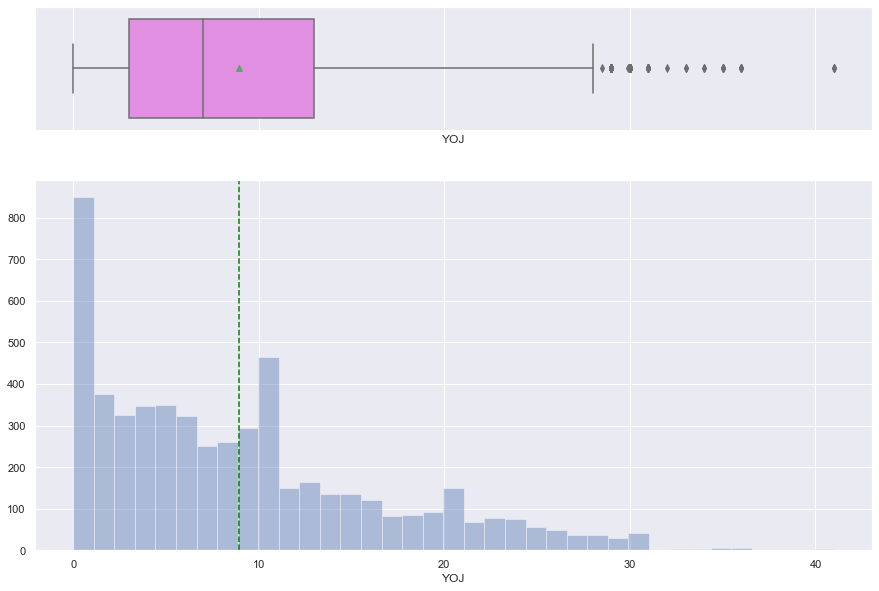

In [22]:
histogram_boxplot(data['YOJ'])

**Observations**
 - YOJ has very few outliers
 - Its distribution looks more like poisson distribution

### Observations on CLAGE

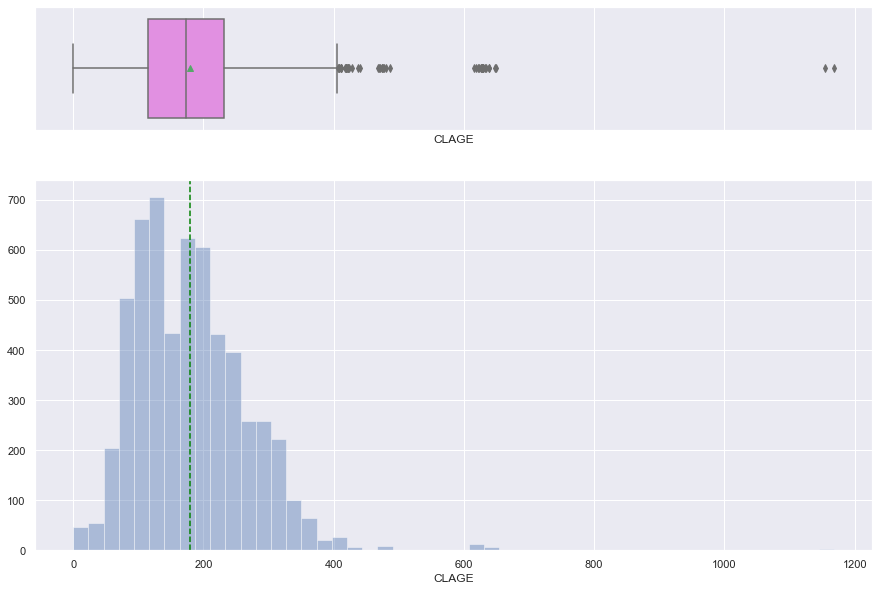

In [23]:
histogram_boxplot(data['CLAGE'])

**Observations**
 -  CLAGE has very few upper oultiers
 - Its distribution looks more like normal distribution

### Observations on NINQ

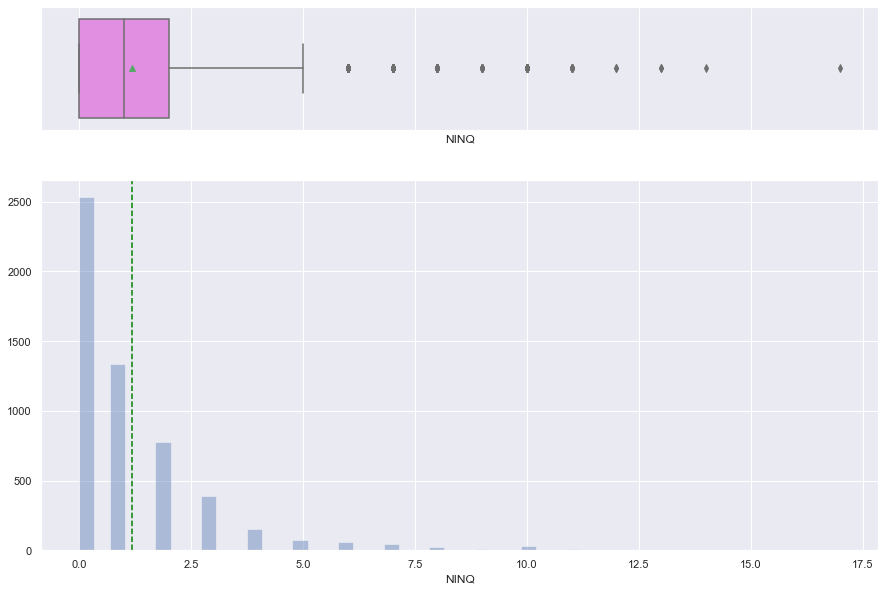

In [24]:

histogram_boxplot(data['NINQ'])

**Observations**
 - NINQ distribution looks more like poisson distribution

### Observations on CLNO

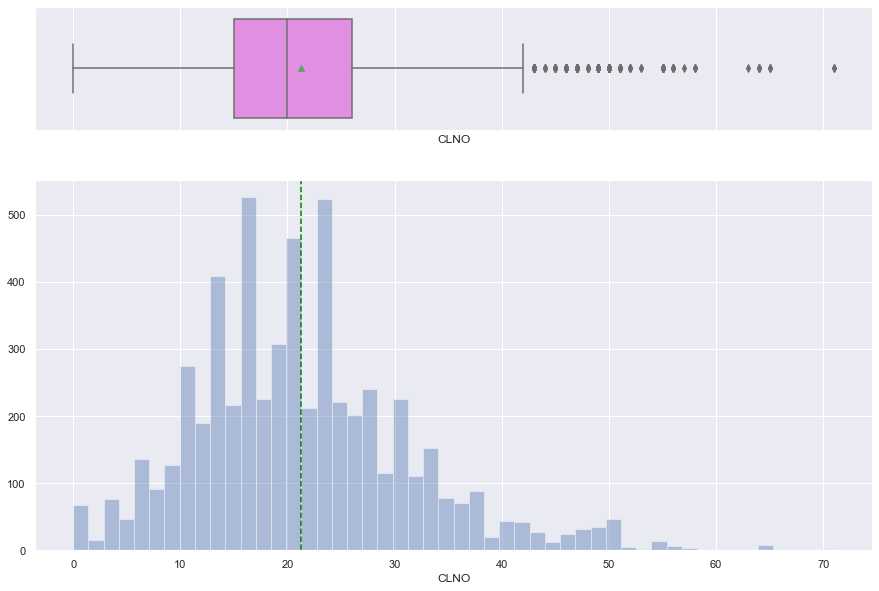

In [25]:

histogram_boxplot(data['CLNO'])

**Observations**
 - CLNO has few upper outliers
 - Its distribution looks more like normal distribution

### Observations on DEBTINC

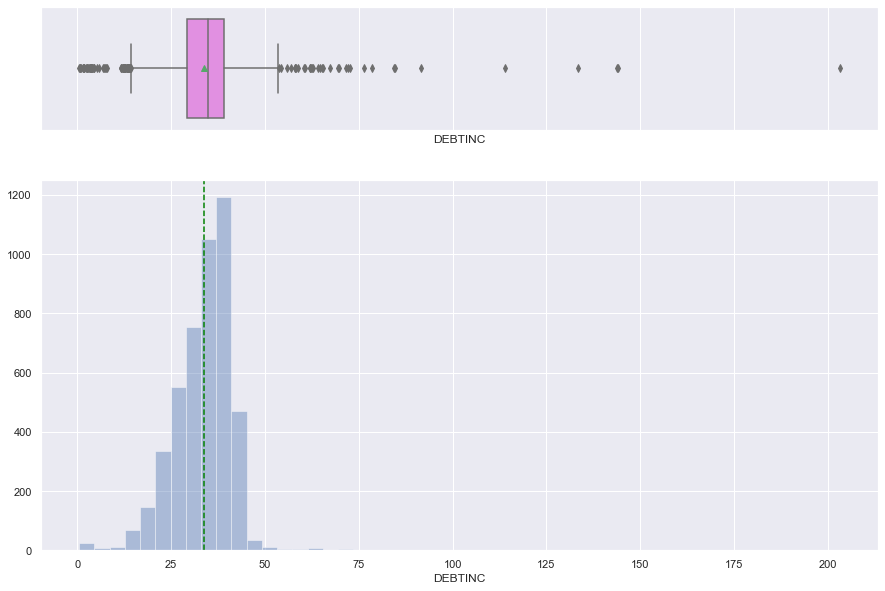

In [26]:

histogram_boxplot(data['DEBTINC'])

**Observations**
 - DEBTINC has both upper and lower outliers
 - Its mean mean is very close to its median.
 - Its distribution is somewhat normal

In [27]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

### Observations on DELINQ

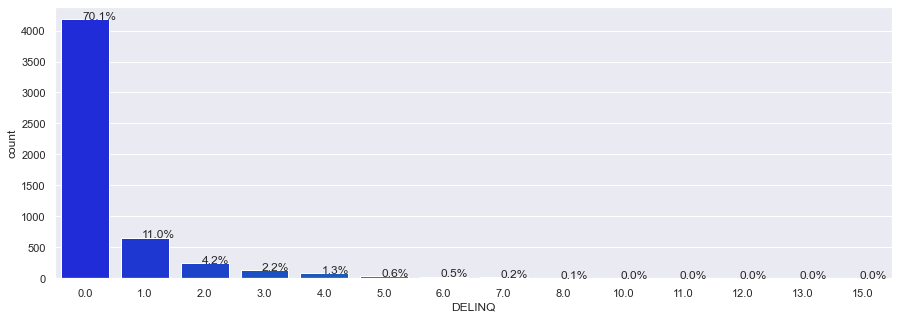

In [28]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Observations**
- Majority of customer (70%) has not 0 delinq (Number of delinquent credit lines), meaning majority of customers not delinquent

### Observations on DEROG

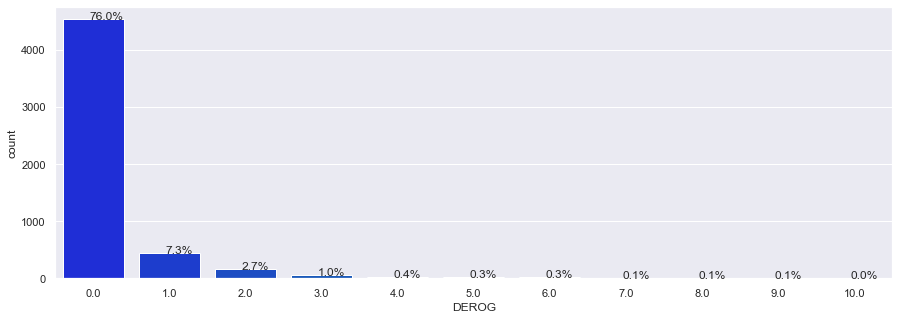

In [29]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["DEROG"],palette='winter')
perc_on_bar(ax,data["DEROG"])

**Observations**
 -Majority (76%) of customers have 0 derog , that is 76% of customer are not among those who are serious late payments maker

### Observations on REASON

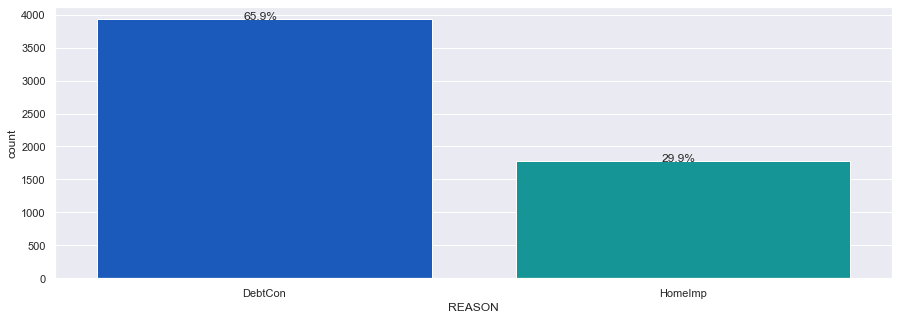

In [30]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

**Observations**
 -  Majority of customers (66%) take loan for DebtCon i.e debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts

### Observations on JOB


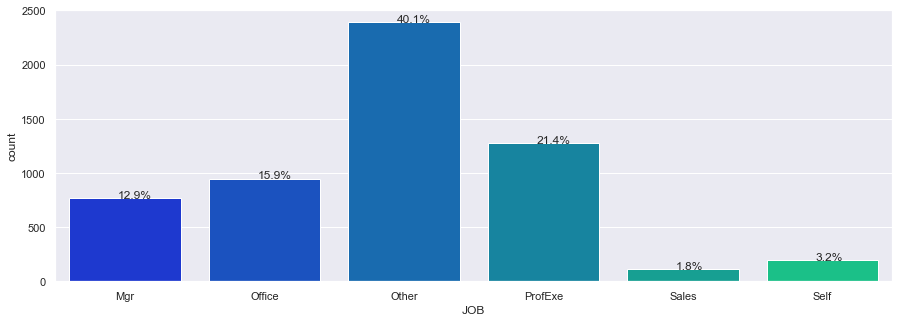

In [31]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

**Observations**
- 40% of customer's JOB role is other.
- 21% of customers have JOB role of ProfEXe

### Observations on BAD

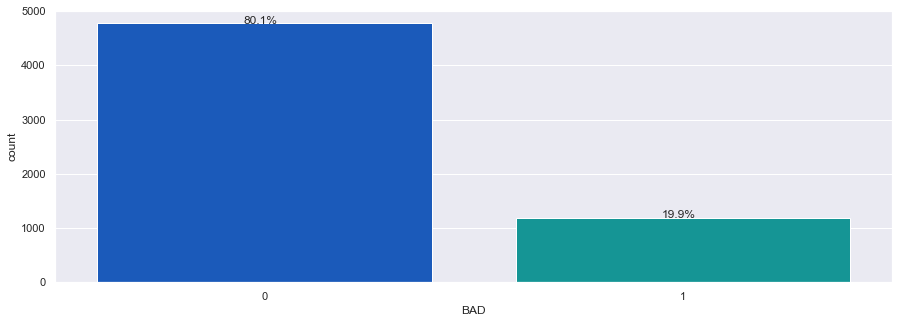

In [32]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["BAD"],palette='winter')
perc_on_bar(ax,data["BAD"])

**Observations**
-  80% of customers have good loan i.e they paid back the loan while 20% of customers are defaulters
- Base line model accuracy is 80%

## Bivariate Analysis

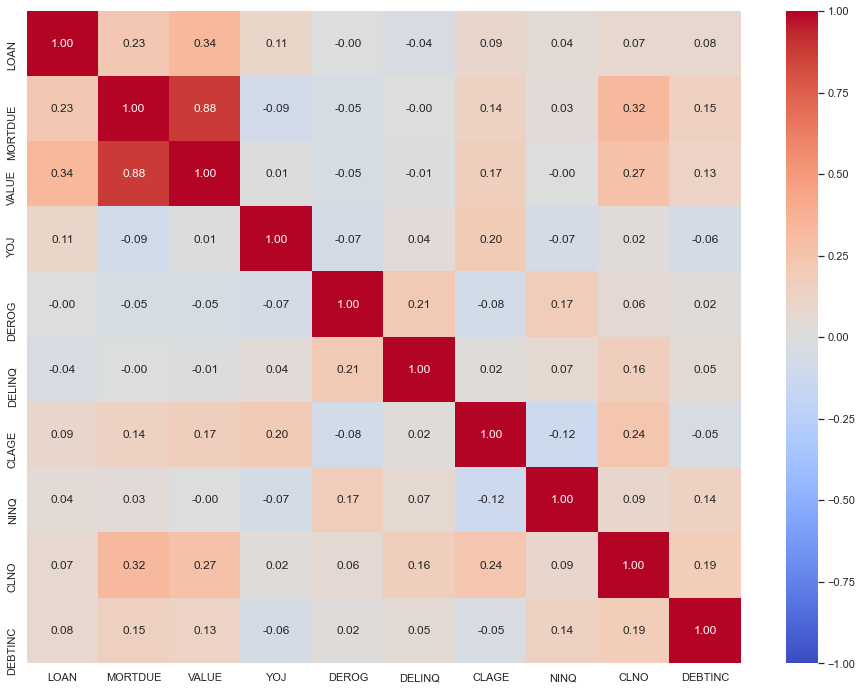

In [33]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
corr = data[numerical_col].corr()

# plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

**Observations**
 - VALUE and MORTDUE highly correlated with correlation value of 0.88 which is obviuos as those customers whose value (current value of of property is high) will have high Amount due on existing mortage (MORTDUE)

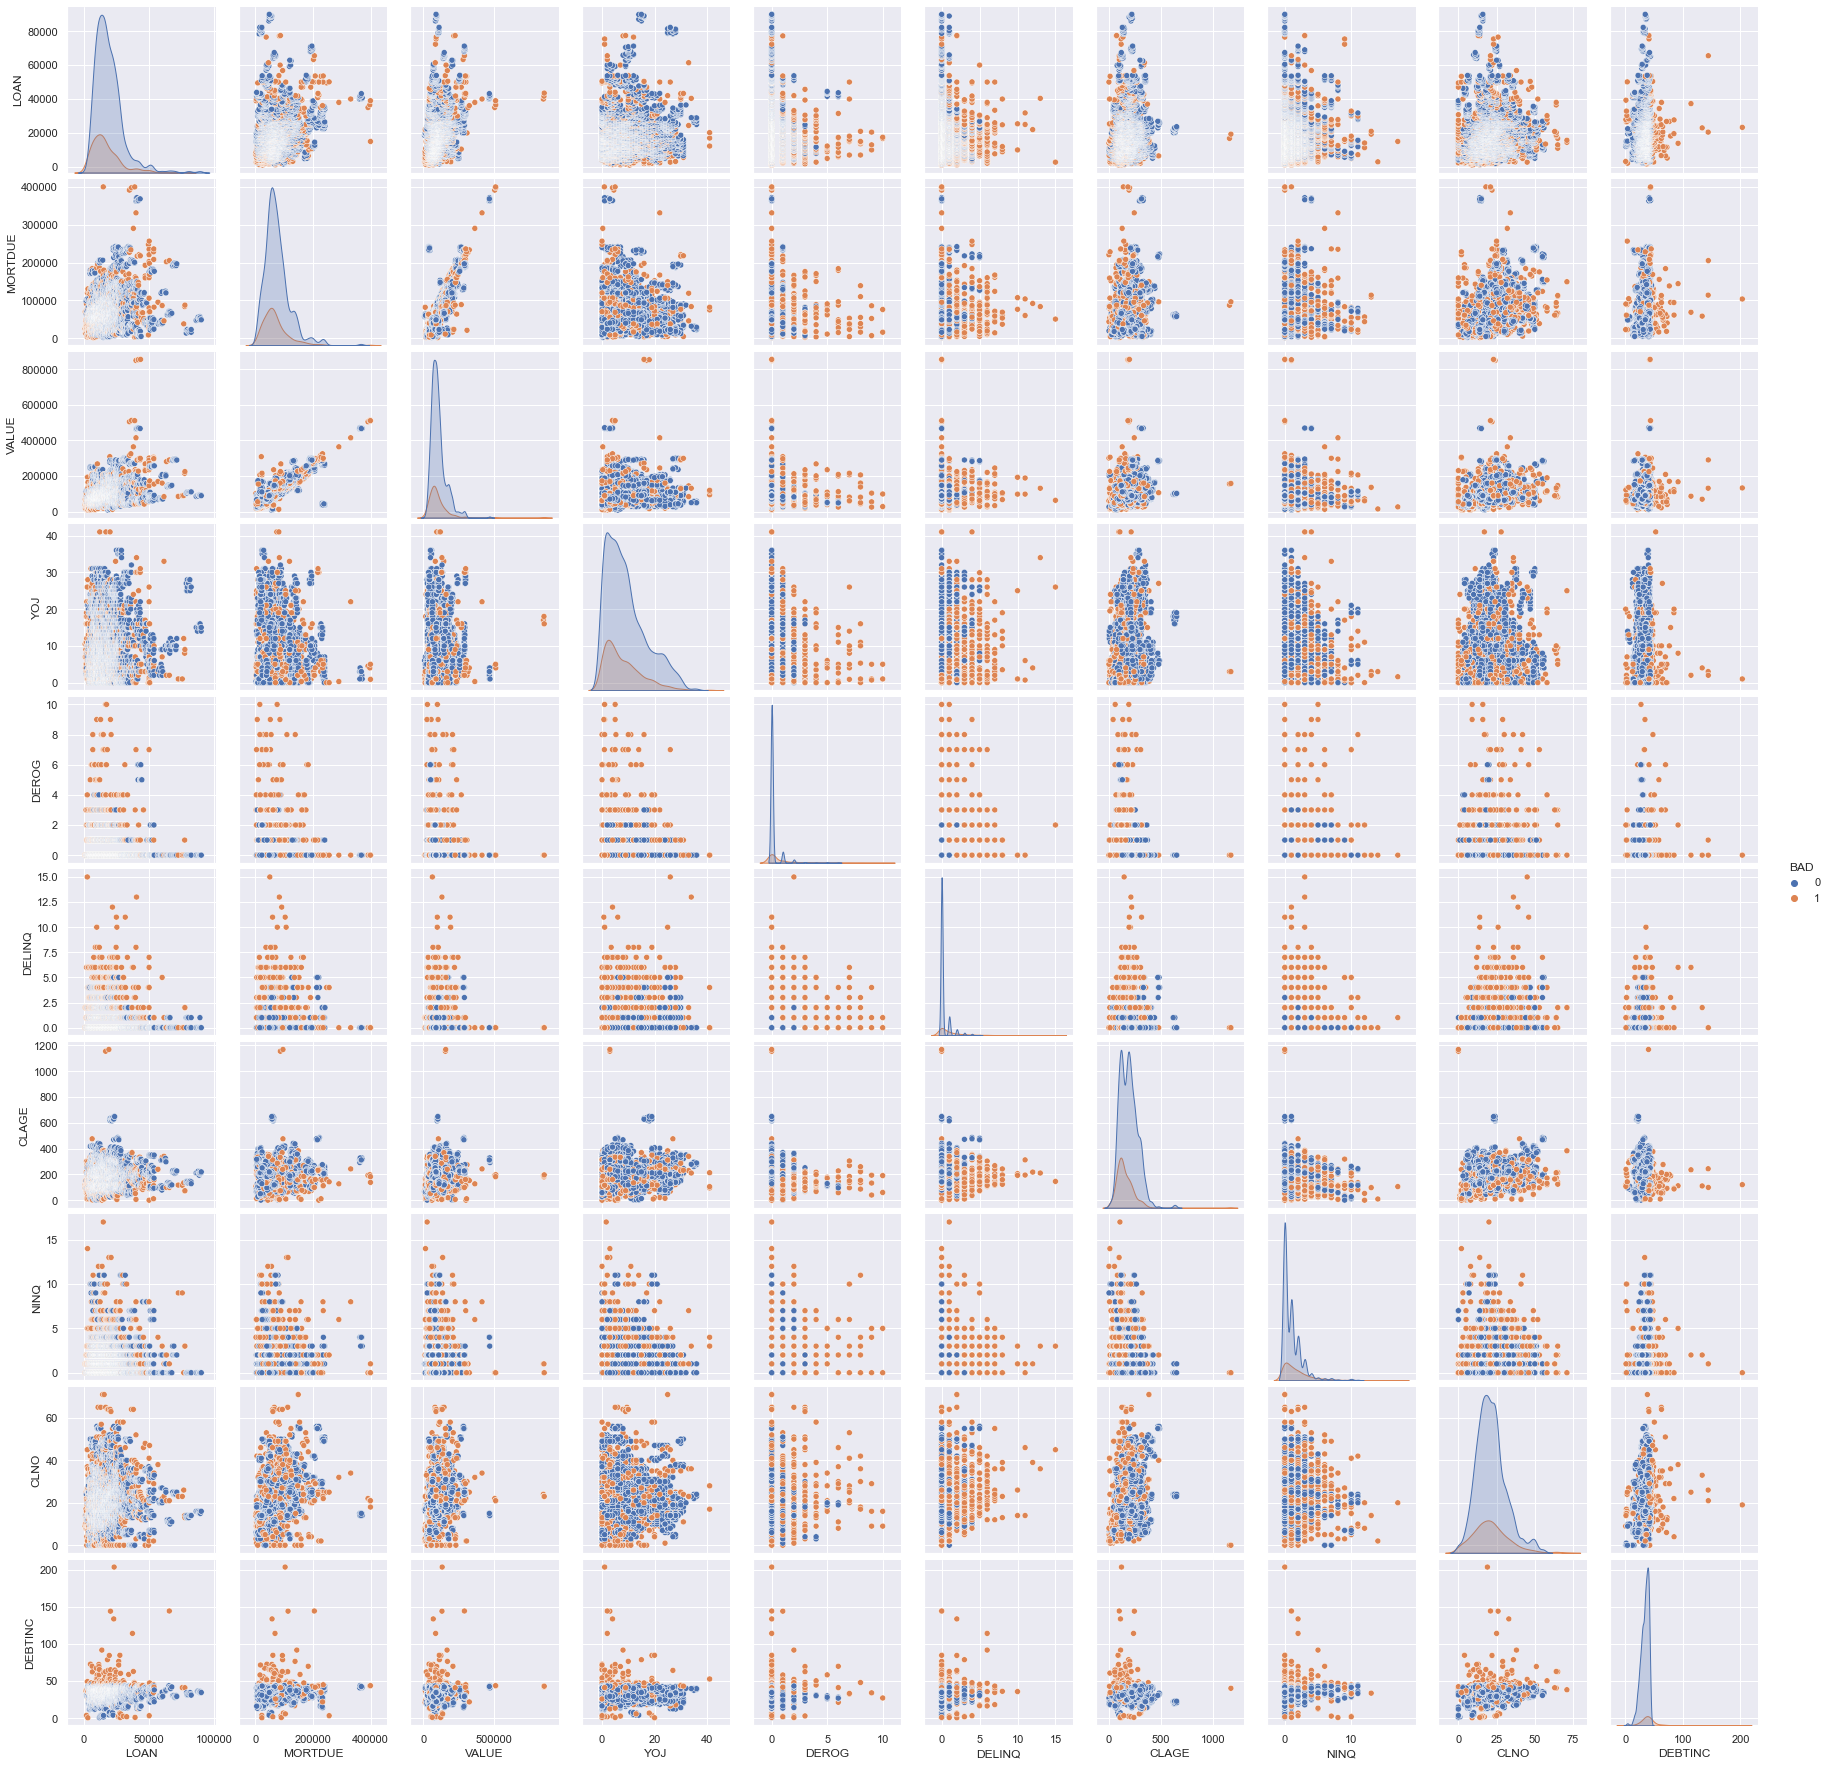

In [34]:
sns.pairplot(data,hue='BAD')
plt.show()

* We can see varying distributions in variables for BAD, we should investigate it further.

### BAD vs numerical independent columns

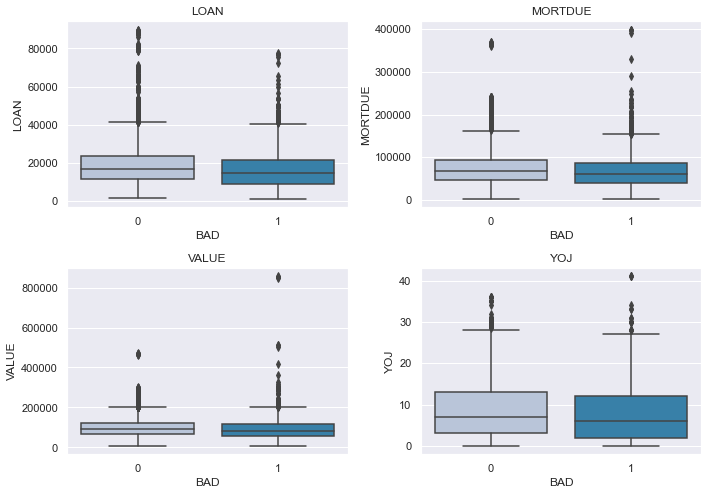

In [35]:
cols = data[['LOAN','MORTDUE','VALUE','YOJ']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["BAD"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Observations**
 - IQR (inter quantile range ) of LOAN amount of defaulters is slightly less than that of non-defaulters.
 

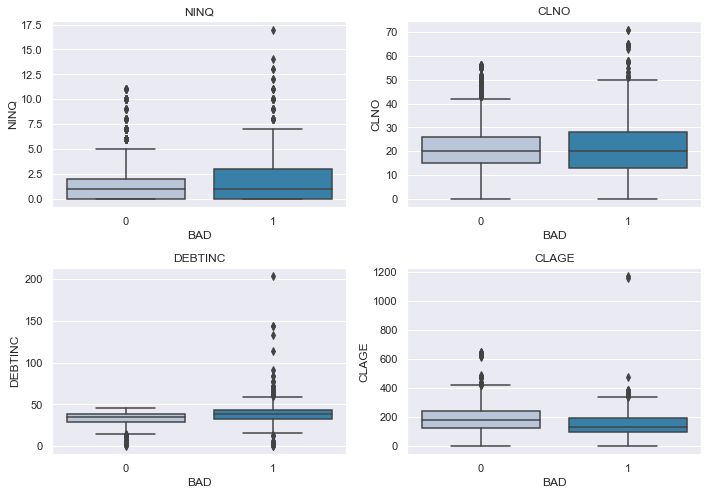

In [36]:

cols = data[['NINQ','CLNO','DEBTINC','CLAGE']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["BAD"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Observations**
 - Standard deviation of CLAGE is more for non-defaulter than defaulters
 - Lower value of CLAGE (Age of the oldest credit line in months.) indicates higher higher chances of defaulting. 
 - defaulting Customers have many upper outliers in DEBTINC, indicating that higher value of DEBTINC indicates higher chances of defaulting 

In [37]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


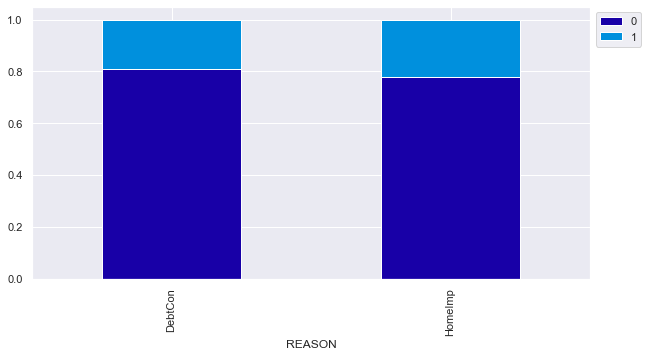

In [38]:
stacked_plot(data['REASON'])

**Observations**
 - Proportion of defaulters customer for both reason lookes almost same

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


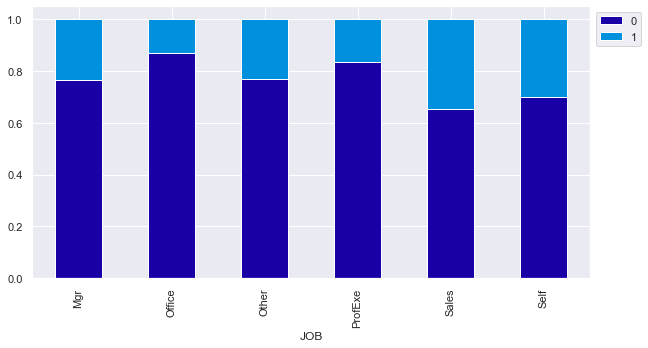

In [39]:
stacked_plot(data['JOB'])

**Observations**
 - Proportion of defaulters are different for customers of different JOB type.
 - Proportion of defaulters in those customers whose Job type is sales is higher than all other customers of others job types, indicating that those customers have higher chances of defaulting 

BAD       0     1   All
DEROG                  
0.0    3773   754  4527
1.0     266   169   435
2.0      78    82   160
3.0      15    43    58
4.0       5    18    23
5.0       8     7    15
6.0       5    10    15
7.0       0     8     8
8.0       0     6     6
9.0       0     3     3
10.0      0     2     2
All    4150  1102  5252
------------------------------------------------------------------------------------------------------------------------


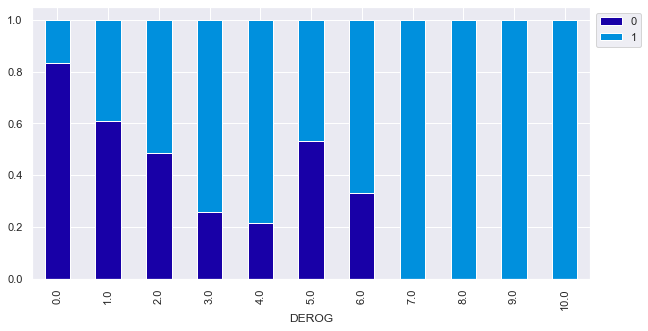

In [40]:
stacked_plot(data['DEROG'])

**Observations**
 - customers whose DEROG is more than 3 have very high chances of defaulting

BAD        0     1   All
DELINQ                  
0.0     3596   583  4179
1.0      432   222   654
2.0      138   112   250
3.0       58    71   129
4.0       32    46    78
5.0        7    31    38
6.0        0    27    27
7.0        0    13    13
8.0        0     5     5
10.0       0     2     2
11.0       0     2     2
12.0       0     1     1
13.0       0     1     1
15.0       0     1     1
All     4263  1117  5380
------------------------------------------------------------------------------------------------------------------------


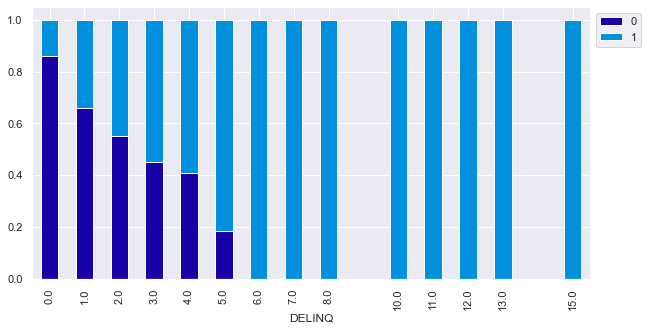

In [41]:
stacked_plot(data['DELINQ'])

**Observations**
-  Customers whose DELINQ is more than 3 have very high chances (more than 50%) of defaulting

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Fit  on the train data.
4. Tune the model and prune the tree, if required.
5. Test the data on test set.

### Data Preparations

#### Treating Outliers

In [42]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    


### we are treating outliers only for some model like logistic regression as its predictive power get diminished by presence of outliers

In [43]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

In [44]:
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df
    

In [45]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    

### Treat Missing values in numerical columns with median and mode in categorical variables

In [46]:
# Select numeric columns.
a = df.select_dtypes('number')
# Select string and object columns.
b = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
df[a.columns] = a.fillna(a.median())
# Fill object columns with mode.
for column in b:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)




## Logistic regression model

In [47]:
X = df.drop(['BAD'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['BAD']

In [48]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(4172, 27) (1788, 27)


In [49]:
y.value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

## Model evaluation criterion

### Model can make wrong predictions in following ways:
1. Predicting an customer will default and the customer doesn't default in reality (False Positive)
2. Predicting an customer will not default and the customer default in reality (False Negative)

### Which loss is more important or more expensive/damaging ? 
* Predicting that customers will not default but he default in reality (False Negative) is more expensive as this will lead to huge loss for bank when customers will not be paying loan back to the bank.

Therefore bank would want to capture as many customers as possible would would not be able to repay the loan (defaulters)

### How to reduce this loss i.e need to reduce False Negatives?
* Bank wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can minimize the bad loans or NPA

In [50]:
log_reg = LogisticRegression(solver='newton-cg')
# Training the basic logistic regression model with training set 
log_reg.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [51]:
#Predict for train set
pred_train = log_reg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
#mat_train = confusion_matrix(y_train,pred_train)


def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_predict,y_actual, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['Defaulted','Not defaulted']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



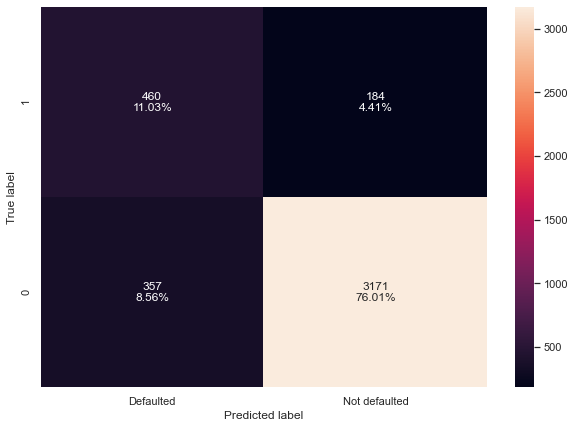

In [52]:
# let us make confusion matrix on train
make_confusion_matrix(y_train,pred_train)

**Prediction on test set**

confusion matrix = 



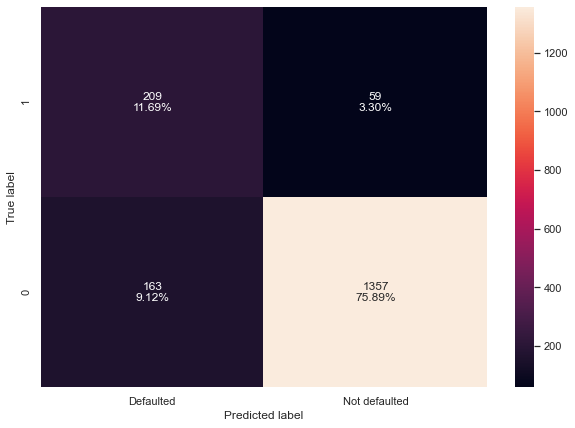

In [53]:
#Predict for test set
pred_test = log_reg.predict(X_test)


print("confusion matrix = \n")
make_confusion_matrix(y_test,pred_test)

In [54]:
#Accuracy and precision with a threhold of 0.5
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))
print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:', recall_score(y_test, pred_test))
print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:', precision_score(y_test, pred_test))

Accuracy on train data: 0.8703259827420902
Accuracy on test data: 0.8758389261744967
Recall on train data: 0.5630354957160343
Recall on test data: 0.5618279569892473
Precision on train data: 0.7142857142857143
Precision on test data: 0.7798507462686567


**Observation**
- Accuracy of logistic regression model is close to base line model which is 87%a
- Recall of logistic regression model is 57% on train and 56% on test

In [55]:
# lets store the logistic regression performances in a list 
log_performances = ['logistic regression model',0.87,0.875, 0.57, 0.56,0.71,0.77]

**Let's define functions to provide metric scores (accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [56]:
##  Function to calculate recall score
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [57]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [58]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [59]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0],X_test=X_test):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* We can use class_weights={0:0.20,1:0.80} as this is the original imbalance in the dataset.

* class_weight is a hyperparameter for the decision tree classifier.

#### Since Outliers Does not impact the Decision Tree model, therefore there is no need to treat outliers in Decision Tree model

### Data Preparation for tree based model

In [60]:
# Add binary flags
# list of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)
    

In [61]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
a = data.select_dtypes('number')
# Select string and object columns.
b = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
data[a.columns] = a.fillna(a.median())
# Fill object columns with mode.
for column in b:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)




### Data Split

In [62]:
X = data.drop(['BAD'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data['BAD']

In [63]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(4172, 27) (1788, 27)


In [64]:
y.value_counts(normalize=1)

0    0.800503
1    0.199497
Name: BAD, dtype: float64

In [65]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.20,1:0.80},random_state=1)

In [66]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

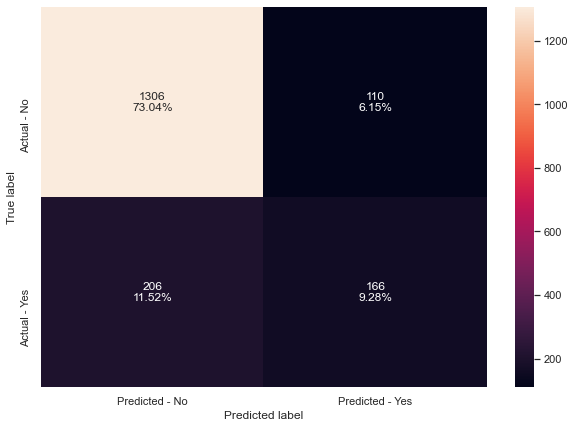

In [67]:
make_confusion_matrix(dtree,y_test)

**Confusion Matrix -**

* Customers defaulted and the model predicted it correctly that is customers will default :  True Positive (observed=1,predicted=1)

* Customers didn't default and the model predicted customers will default : False Positive (observed=0,predicted=1)

* Customers didn't default and the model predicted Customers will not default : True Negative (observed=0,predicted=0)

* Customers defaulted and the model predicted that Customers won't : False Negative (observed=1,predicted=0)

In [68]:
dtree_acc = get_accuracy_score(dtree)
dtree_recall = get_recall_score(dtree)
dtree_precision = get_precision_score(dtree)

Accuracy on training set :  0.9264141898370086
Accuracy on test set :  0.8232662192393736
Recall on training set :  0.7025703794369645
Recall on test set :  0.44623655913978494
Precision on training set :  0.8996865203761756
Precision on test set :  0.6014492753623188


**Observations**
 - Accuracy of Decision Tree is very 100% on train and set 86% on test set , which indicates that it has overfit.
 - Recall on this model is 70% on train set and 44% on test set

### Random Forest

In [69]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

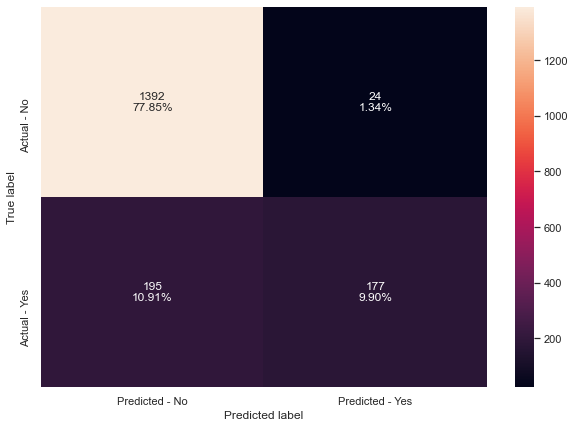

In [70]:
make_confusion_matrix(rf,y_test)

In [71]:
rf_acc = get_accuracy_score(rf)
rf_recall = get_recall_score(rf)
rf_precision = get_precision_score(rf)

Accuracy on training set :  0.9448705656759347
Accuracy on test set :  0.87751677852349
Recall on training set :  0.7258261933904528
Recall on test set :  0.47580645161290325
Precision on training set :  0.989983305509182
Precision on test set :  0.8805970149253731


**Observation**
- Recall of Random forest is 72% on train and 47% on test indicating that is overfit.

**Random forest with class weights**

In [72]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

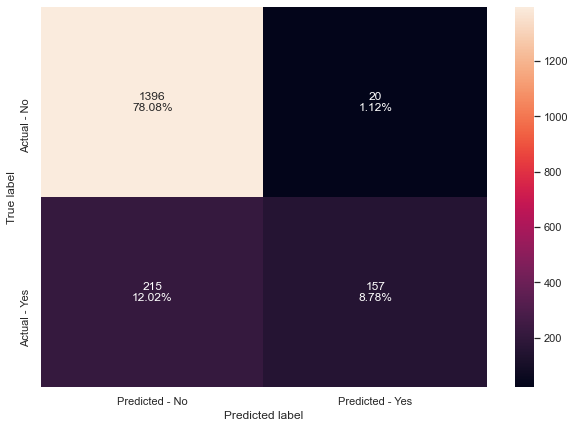

In [73]:
make_confusion_matrix(rf_wt,y_test)

In [74]:
wt_rf_acc = get_accuracy_score(rf_wt)
wt_rf_recall = get_recall_score(rf_wt)
wt_rf_precision = get_precision_score(rf_wt)

Accuracy on training set :  0.9388782358581016
Accuracy on test set :  0.8685682326621924
Recall on training set :  0.6952264381884945
Recall on test set :  0.4220430107526882
Precision on training set :  0.9895470383275261
Precision on test set :  0.8870056497175142


### Tuning Models

### Using GridSearch for Hyperparameter tuning model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

**Tuning Decision Tree**

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=10,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

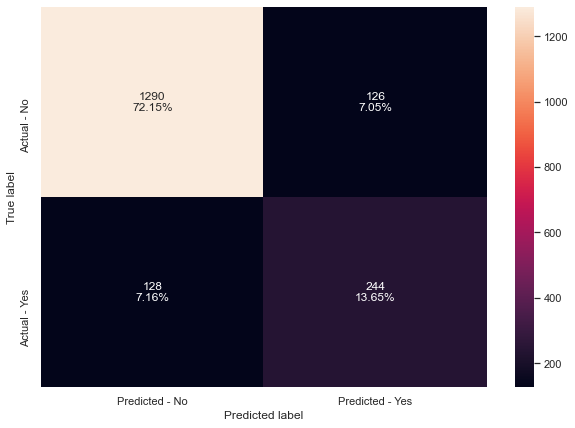

In [77]:
make_confusion_matrix(dtree_estimator,y_test)

In [78]:
tuned_dtree_acc = get_accuracy_score(dtree_estimator)
tuned_dtree_recall = get_recall_score(dtree_estimator)
tuned_dtree_precision = get_precision_score(dtree_estimator)

Accuracy on training set :  0.8631351869606904
Accuracy on test set :  0.8579418344519015
Recall on training set :  0.6854345165238678
Recall on test set :  0.6559139784946236
Precision on training set :  0.6407322654462243
Precision on test set :  0.6594594594594595


**Observations**
- Accuracy of tuned decision tree is better than base line mode which is 86% on test and 86% on train set.add
- Recall of tuned decision tree is 68% on test set and 65% on train set.

### plotting decision tree

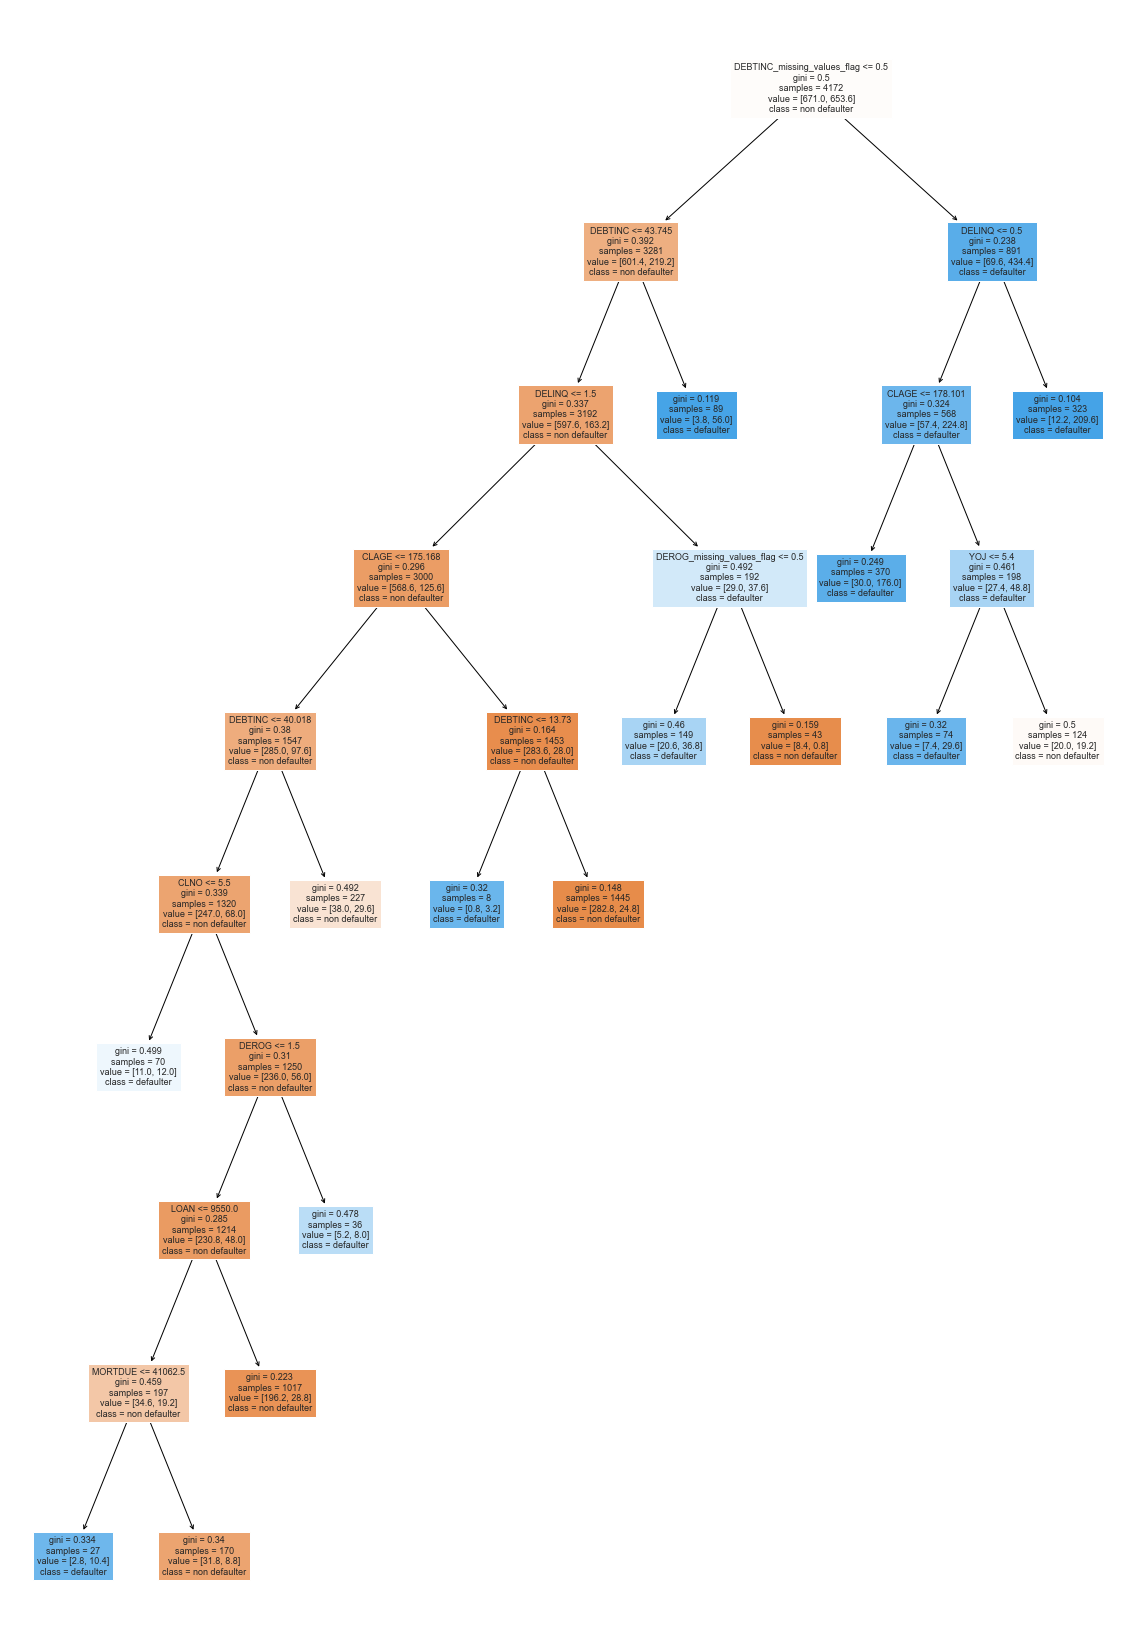

In [79]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(dtree_estimator,feature_names=X_train.columns.tolist(),filled=True,fontsize=9,node_ids=False,class_names=['non defaulter','defaulter'],)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [80]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dtree_estimator,feature_names=X_train.columns.tolist(),show_weights=True))

|--- DEBTINC_missing_values_flag <= 0.50
|   |--- DEBTINC <= 43.75
|   |   |--- DELINQ <= 1.50
|   |   |   |--- CLAGE <= 175.17
|   |   |   |   |--- DEBTINC <= 40.02
|   |   |   |   |   |--- CLNO <= 5.50
|   |   |   |   |   |   |--- weights: [11.00, 12.00] class: 1
|   |   |   |   |   |--- CLNO >  5.50
|   |   |   |   |   |   |--- DEROG <= 1.50
|   |   |   |   |   |   |   |--- LOAN <= 9550.00
|   |   |   |   |   |   |   |   |--- MORTDUE <= 41062.50
|   |   |   |   |   |   |   |   |   |--- weights: [2.80, 10.40] class: 1
|   |   |   |   |   |   |   |   |--- MORTDUE >  41062.50
|   |   |   |   |   |   |   |   |   |--- weights: [31.80, 8.80] class: 0
|   |   |   |   |   |   |   |--- LOAN >  9550.00
|   |   |   |   |   |   |   |   |--- weights: [196.20, 28.80] class: 0
|   |   |   |   |   |   |--- DEROG >  1.50
|   |   |   |   |   |   |   |--- weights: [5.20, 8.00] class: 1
|   |   |   |   |--- DEBTINC >  40.02
|   |   |   |   |   |--- weights: [38.00, 29.60] class: 0
|   |   |   |--- CLAG

# Business Rules From Decision Tree
<font color='red'>

* Rule 1: If customer's  DEBTINC is missing , then those customers will default.

* Rule 2: If customer's DEBTINC greater than 43.7  , then those customers will default.

* Rule 3. If customers DEBTINC less than 43.7 and DELINC is greater than 1.5 , than those customers will default
    
</font>

**Tuning Random Forest**

In [81]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(class_weight={0:0.2,1:0.8},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                #'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None,.65],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_features='sqrt',
                       min_samples_leaf=11, n_estimators=30, oob_score=True,
                       random_state=1)

In [ ]:
rf_estimator.save('.h5')

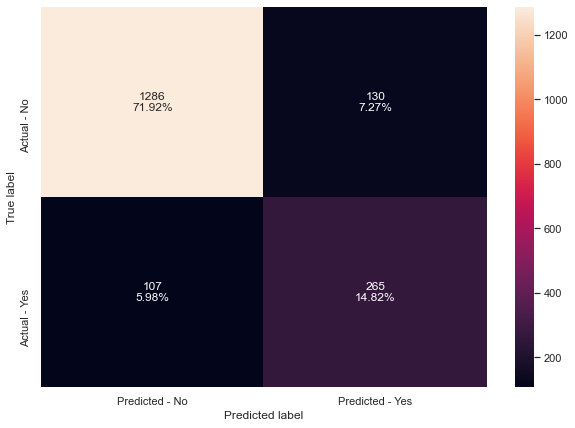

In [82]:
make_confusion_matrix(rf_estimator,y_test)

In [83]:
tuned_rf_acc = get_accuracy_score(rf_estimator)
tuned_rf_recall = get_recall_score(rf_estimator)
tuned_rf_precision = get_precision_score(rf_estimator)

Accuracy on training set :  0.8835091083413231
Accuracy on test set :  0.8674496644295302
Recall on training set :  0.791921664626683
Recall on test set :  0.7123655913978495
Precision on training set :  0.671858774662513
Precision on test set :  0.6708860759493671


**Observations**
- Accuracy of Tuned random forest is 90% on train and 87% on test.
- Recall of this model is 87% on train and 76% on test set.

### Comparing all the models

In [84]:
# defining list of models
models = [dtree,dtree_estimator,rf,rf_wt,rf_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [85]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree',
                                          'Random Forest','Weighted Random Forest','Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
df_length = len(comparison_frame)
comparison_frame.loc[df_length] = log_performances # adding performances of logistic regression model
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,0.926414,0.823266,0.702570,0.446237,0.899687,0.601449
1,Tuned Decision Tree,0.863135,0.857942,0.685435,0.655914,0.640732,0.659459
2,Random Forest,0.944871,0.877517,0.725826,0.475806,0.989983,0.880597
3,Weighted Random Forest,0.938878,0.868568,0.695226,0.422043,0.989547,0.887006
4,Tuned Random Forest,0.883509,0.867450,0.791922,0.712366,0.671859,0.670886
5,logistic regression model,0.870000,0.875000,0.570000,0.560000,0.710000,0.770000


In [86]:
comparison_frame.style.bar(subset=['Test_Accuracy', 'Test_Recall','Test_Precision'], color='#d65f5f')


,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,0.926414,0.823266,0.702570,0.446237,0.899687,0.601449
1,Tuned Decision Tree,0.863135,0.857942,0.685435,0.655914,0.640732,0.659459
2,Random Forest,0.944871,0.877517,0.725826,0.475806,0.989983,0.880597
3,Weighted Random Forest,0.938878,0.868568,0.695226,0.422043,0.989547,0.887006
4,Tuned Random Forest,0.883509,0.867450,0.791922,0.712366,0.671859,0.670886
5,logistic regression model,0.870000,0.875000,0.570000,0.560000,0.710000,0.770000


* Tuned Random Forest has better recall (71%) on test than Weighted Random Forest (42%)

* Taking into consideration all metrics (Accuracy, Recall and Precision) , we see that Tuned Random Forest performs better than all other models

### Feature importance of tuned Random Forest

In [87]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
DEBTINC_missing_values_flag  0.293460
DEBTINC                      0.226065
DELINQ                       0.092619
CLAGE                        0.074924
DEROG                        0.046460
VALUE                        0.040637
LOAN                         0.040087
MORTDUE                      0.035414
NINQ                         0.031339
CLNO                         0.031151
YOJ                          0.027534
VALUE_missing_values_flag    0.016467
DEROG_missing_values_flag    0.009760
JOB_Other                    0.006298
JOB_Office                   0.004851
REASON_HomeImp               0.004080
CLAGE_missing_values_flag    0.003981
JOB_ProfExe                  0.003700
JOB_missing_values_flag      0.002625
MORTDUE_missing_values_flag  0.001696
JOB_Sales                    0.001496
YOJ_missing_values_flag      0.001423
DELINQ_missing_values_flag   0.001143
NINQ_missing_values_flag     0.000990
CLNO_missing_values_flag     0.000906
REASON_missi

In [88]:
feature_names = X_train.columns

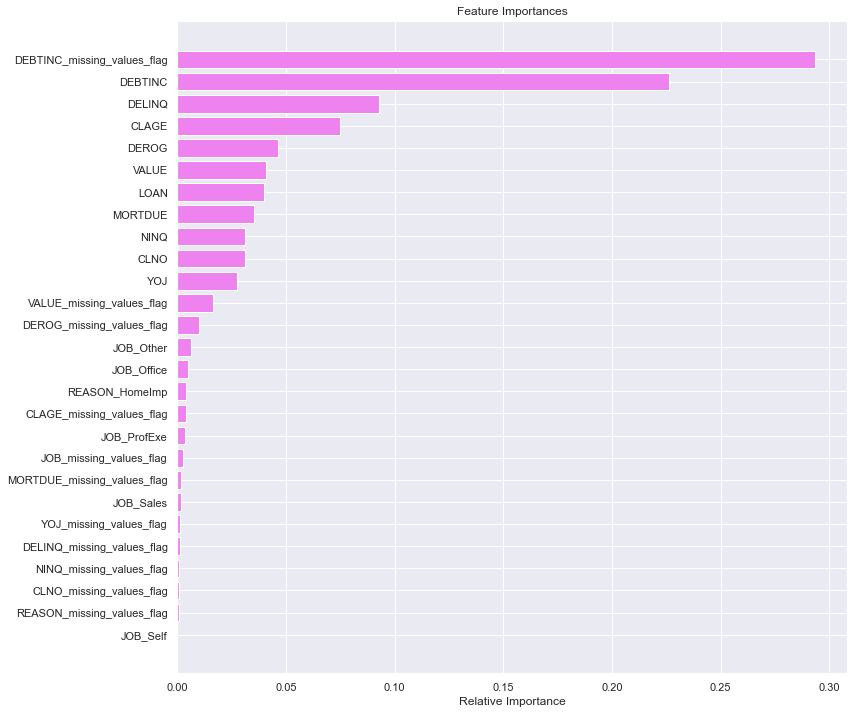

In [89]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Business Insights

* We have been able to build a predictive model and after achieving the required model performance company can use this model to identify customers who are at the risk of defaulting and shall take appropriate actions to build better retention policies. 

* Most Important factors that drive default - DEBTINC_missing_values_flag, DEBTINC, DELINC and CLAGE.
* DEBTINC_missing_values_flag:we saw that Customers with very high DEBTINC values has most of the missing values,indicating customers that have presence of missing value in DEBTINC tend to higher chances of defaulting. It needs to be investigated as to why customers have missing value in this feature 
* DEBTINC: Those customers whose DETINC value is higher has higher chances of defaulting

* DELINC: Those customers having higher DELINC have higher chances of defaulting
* CLAGE : Those customers with lower value of CLAGE (Age of the oldest credit line in months.) have higher chances of defaulting


# Business Recommendations:
* 1. Best model to be used for production is Tuned Random Forest. This will help in automating the decision to filter out those customers who wont be able to pay back the loan, on large scale.The recall of this model is 71% which means out of all those customers who are actually going to default, model will be able to capture 71% of them. The precision of this model is 67% which means out of all positive(default) prediction , 67% of its prediction are correct. The accuracy of this model is 87% which means model makes correct prediction 87% of the time. 
** 2.1 Bank should not approve loans to those customers:
   If customer's DEBTINC is missing as those customers have very high chances of defaulting.
** 2.2 Bank should not approve loans to those customers:
   If customer's DEBTINC greater than 43.7 , as those customers have very high chances of defaulting.
** 2.3 Bank should not approve loans to those customers:
   If customers DEBTINC less than 43.7 and DELINC is greater than 1.5 , as those customers have very high chances of defaulting.
   
* 3. Bank should investigate as to why there is missing values in DEBTINC of customers, as majority of all those customers with missing values in this features are loan defaulter.

